# importing Libraries

In [56]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,precision_score,recall_score,roc_auc_score
from sklearn.metrics import f1_score,roc_curve,confusion_matrix,classification_report,multilabel_confusion_matrix


# Problem statement : to train a classification model on survivals of Titanic travelers

## Data Gathering

In [2]:
df = pd.read_csv('titanic.csv')
df

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Gender       891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.392817,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.504490,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,4.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
df.PassengerId.nunique()

891

In [6]:
df.Survived.unique()

array([0, 1, 2, 4], dtype=int64)

In [7]:
df.loc[(df['Survived']==2)|(df['Survived']==4)]

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
24,25,2,3,"Palsson, Miss. Torborg Danira",female,8.0,3,1,349909,21.075,NaN,S
26,27,4,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.225,NaN,C


<AxesSubplot:xlabel='Survived', ylabel='count'>

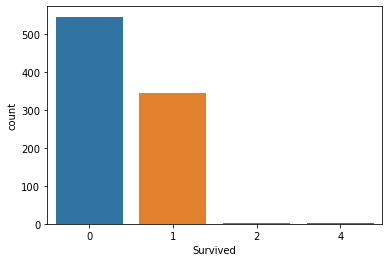

In [8]:
sns.countplot(x='Survived',data=df)

<AxesSubplot:xlabel='Survived', ylabel='count'>

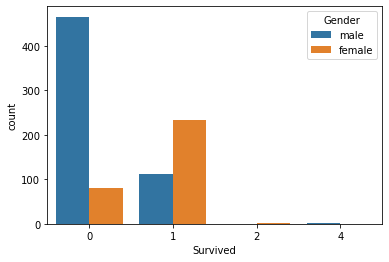

In [9]:
sns.countplot(x='Survived',hue='Gender',data=df)

<AxesSubplot:xlabel='Survived', ylabel='count'>

<AxesSubplot:xlabel='Survived', ylabel='count'>

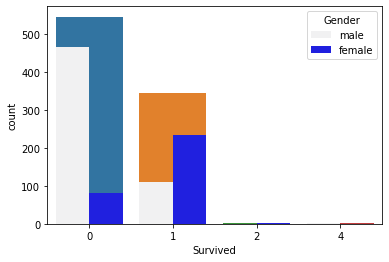

In [10]:
display(sns.countplot(x='Survived',data=df))
display(sns.countplot(x='Survived',hue='Gender',data=df,color='Blue'))

In [11]:
df['Survived'].replace({2:1,4:0},inplace=True)

In [12]:
df.Survived.unique()

array([0, 1], dtype=int64)

<AxesSubplot:xlabel='Pclass', ylabel='count'>

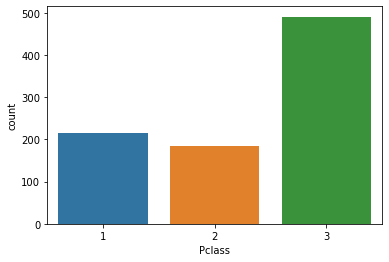

In [13]:
sns.countplot(x='Pclass',data=df)

<AxesSubplot:xlabel='Pclass', ylabel='count'>

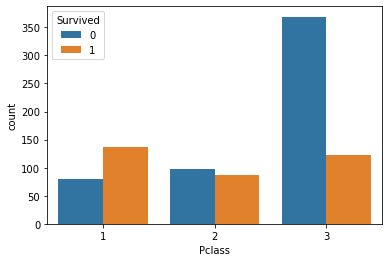

In [14]:
sns.countplot(x='Pclass',hue='Survived',data=df)

<AxesSubplot:xlabel='Pclass', ylabel='count'>

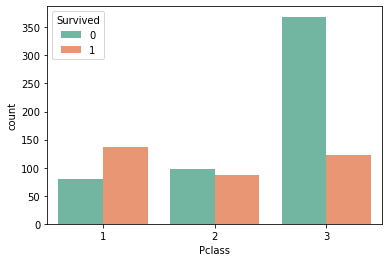

In [15]:
sns.countplot(x='Pclass',hue='Survived',data=df,palette='Set2')

<AxesSubplot:xlabel='Fare'>

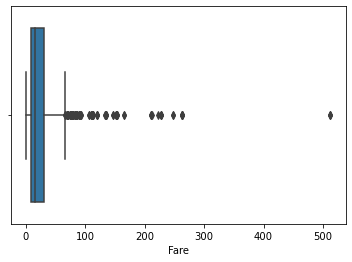

In [16]:
import warnings
warnings.filterwarnings('ignore')
sns.boxplot('Fare',data=df)

In [17]:
df

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


<AxesSubplot:xlabel='SibSp'>

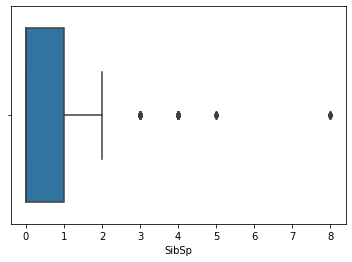

In [18]:
sns.boxplot('SibSp',data=df)

In [19]:
sorted(df['SibSp'].unique())

[0, 1, 2, 3, 4, 5, 8]

<AxesSubplot:xlabel='SibSp', ylabel='count'>

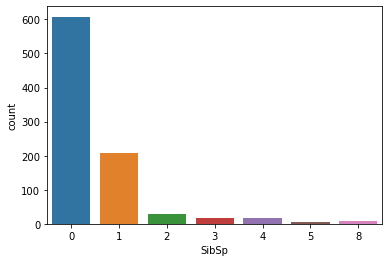

In [20]:
sns.countplot(df['SibSp'])

In [21]:
df[df['SibSp']>2].shape

(46, 12)

In [22]:
df[df['Fare']>200].shape

(20, 12)

In [23]:
df = df[~(df['Fare']>200)]

In [24]:
df.Embarked.unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [25]:
df.Embarked.isna().sum()

2

In [26]:
df.Embarked.value_counts()

S    636
C    156
Q     77
Name: Embarked, dtype: int64

In [27]:
df.Embarked = df.Embarked.fillna('S')

In [28]:
df.Embarked.unique()

array(['S', 'C', 'Q'], dtype=object)

In [29]:
df['Gender']=df['Gender'].replace('male',0).replace('female',1)

In [30]:
df.Gender.unique()

array([0, 1], dtype=int64)

In [31]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Gender', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [32]:
df

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",0,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",1,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",0,26.0,0,0,111369,30.0000,C148,C


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 871 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  871 non-null    int64  
 1   Survived     871 non-null    int64  
 2   Pclass       871 non-null    int64  
 3   Name         871 non-null    object 
 4   Gender       871 non-null    int64  
 5   Age          696 non-null    float64
 6   SibSp        871 non-null    int64  
 7   Parch        871 non-null    int64  
 8   Ticket       871 non-null    object 
 9   Fare         871 non-null    float64
 10  Cabin        187 non-null    object 
 11  Embarked     871 non-null    object 
dtypes: float64(2), int64(6), object(4)
memory usage: 88.5+ KB


In [34]:
df.drop(['PassengerId','Name','Ticket','Cabin'],axis=1, inplace=True)

In [35]:
df.Age = df.Age.fillna(df.Age.mean())

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 871 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  871 non-null    int64  
 1   Pclass    871 non-null    int64  
 2   Gender    871 non-null    int64  
 3   Age       871 non-null    float64
 4   SibSp     871 non-null    int64  
 5   Parch     871 non-null    int64  
 6   Fare      871 non-null    float64
 7   Embarked  871 non-null    object 
dtypes: float64(2), int64(5), object(1)
memory usage: 61.2+ KB


In [37]:
df = pd.get_dummies(df,prefix=['Embarked'],drop_first=True)

In [38]:
df

,Survived,Pclass,Gender,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S
0,0,3,0,22.000000,1,0,7.2500,0,1
1,1,1,1,38.000000,1,0,71.2833,0,0
2,1,3,1,26.000000,0,0,7.9250,0,1
3,1,1,1,35.000000,1,0,53.1000,0,1
4,0,3,0,35.000000,0,0,8.0500,0,1
...,...,...,...,...,...,...,...,...,...
886,0,2,0,27.000000,0,0,13.0000,0,1
887,1,1,1,19.000000,0,0,30.0000,0,1
888,0,3,1,29.661164,1,2,23.4500,0,1
889,1,1,0,26.000000,0,0,30.0000,0,0


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 871 entries, 0 to 890
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    871 non-null    int64  
 1   Pclass      871 non-null    int64  
 2   Gender      871 non-null    int64  
 3   Age         871 non-null    float64
 4   SibSp       871 non-null    int64  
 5   Parch       871 non-null    int64  
 6   Fare        871 non-null    float64
 7   Embarked_Q  871 non-null    uint8  
 8   Embarked_S  871 non-null    uint8  
dtypes: float64(2), int64(5), uint8(2)
memory usage: 56.1 KB


In [40]:
df.corr()

,Survived,Pclass,Gender,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S
Survived,1.000000,-0.322983,0.532938,-0.082279,-0.028772,0.082957,0.296419,0.014483,-0.141358
Pclass,-0.322983,1.000000,-0.118369,-0.340795,0.094324,0.051138,-0.653248,0.216358,0.050278
Gender,0.532938,-0.118369,1.000000,-0.084441,0.110942,0.251004,0.232512,0.079045,-0.115601
Age,-0.082279,-0.340795,-0.084441,1.000000,-0.229770,-0.192121,0.127849,-0.013675,-0.017580
SibSp,-0.028772,0.094324,0.110942,-0.229770,1.000000,0.409380,0.246085,-0.025241,0.065138
Parch,0.082957,0.051138,0.251004,-0.192121,0.409380,1.000000,0.230427,-0.077635,0.066605
Fare,0.296419,-0.653248,0.232512,0.127849,0.246085,0.230427,1.000000,-0.140705,-0.109163
Embarked_Q,0.014483,0.216358,0.079045,-0.013675,-0.025241,-0.077635,-0.140705,1.000000,-0.515309
Embarked_S,-0.141358,0.050278,-0.115601,-0.017580,0.065138,0.066605,-0.109163,-0.515309,1.000000


In [41]:
df.Pclass.unique()

array([3, 1, 2], dtype=int64)

# Building Model

## splitting the data

In [42]:
x = df.drop('Pclass',axis=1)
y = df.Pclass

In [43]:
x

,Survived,Gender,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S
0,0,0,22.000000,1,0,7.2500,0,1
1,1,1,38.000000,1,0,71.2833,0,0
2,1,1,26.000000,0,0,7.9250,0,1
3,1,1,35.000000,1,0,53.1000,0,1
4,0,0,35.000000,0,0,8.0500,0,1
...,...,...,...,...,...,...,...,...
886,0,0,27.000000,0,0,13.0000,0,1
887,1,1,19.000000,0,0,30.0000,0,1
888,0,1,29.661164,1,2,23.4500,0,1
889,1,0,26.000000,0,0,30.0000,0,0


In [44]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=1)


## creating an instance of the model

In [45]:
Log_Reg = LogisticRegression()
Log_Reg.fit(x_train,y_train)

LogisticRegression()

## predicting the values

In [46]:
y_pred = Log_Reg.predict(x_test)
y_pred

array([1, 3, 2, 3, 3, 1, 1, 3, 3, 2, 3, 1, 1, 3, 3, 1, 3, 3, 1, 2, 3, 3,
       3, 3, 3, 3, 1, 3, 2, 3, 1, 3, 1, 2, 3, 3, 1, 3, 3, 2, 1, 3, 1, 3,
       1, 3, 3, 1, 2, 3, 3, 3, 3, 1, 2, 3, 1, 3, 3, 3, 3, 1, 3, 3, 3, 3,
       1, 3, 3, 3, 1, 3, 3, 3, 1, 3, 3, 3, 3, 3, 3, 1, 3, 1, 3, 3, 1, 3,
       3, 3, 3, 3, 3, 3, 1, 1, 1, 3, 3, 2, 1, 3, 3, 2, 1, 3, 1, 3, 1, 3,
       3, 3, 2, 1, 1, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1,
       3, 3, 3, 3, 1, 3, 2, 3, 3, 3, 3, 3, 2, 3, 1, 3, 2, 3, 3, 1, 3, 3,
       3, 1, 3, 3, 3, 3, 3, 1, 2, 3, 3, 3, 3, 2, 3, 3, 1, 3, 1, 1, 1],
      dtype=int64)

In [47]:
y_test

295    1
554    3
183    2
188    3
444    3
      ..
492    1
565    3
599    1
862    1
705    2
Name: Pclass, Length: 175, dtype: int64

# Model Evaluation

In [48]:
cnf_matrix = confusion_matrix(y_test,y_pred)
cnf_matrix

array([[37,  1,  0],
       [ 4, 12, 23],
       [ 2,  4, 92]], dtype=int64)

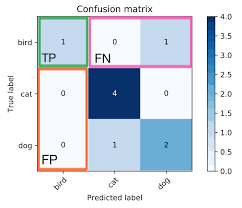

In [58]:
multiclass_conf_matrix = multilabel_confusion_matrix(y_test,y_pred)
multiclass_conf_matrix

array([[[131,   6],
        [  1,  37]],

       [[131,   5],
        [ 27,  12]],

       [[ 54,  23],
        [  6,  92]]], dtype=int64)

In [62]:
# Precision >> Tp/Tp+Fp

(37)/(37+6)   #class1 precision

0.8604651162790697

In [66]:
12/17   #class2 precision

0.7058823529411765

In [68]:
92/(92+23) #class3 precision

0.8

In [69]:
# Recall >> Tp/(Tp+Fn)
37/(37+1)    #class1 recall

0.9736842105263158

In [65]:
# accuracy >> Tp+Tn/Tp+Tn+Fp+Fn

(37+92+12)/(37+92+12+23+4+1+6)

0.8057142857142857

In [52]:
accuracy_score(y_test,y_pred)

0.8057142857142857

In [61]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       0.86      0.97      0.91        38
           2       0.71      0.31      0.43        39
           3       0.80      0.94      0.86        98

    accuracy                           0.81       175
   macro avg       0.79      0.74      0.74       175
weighted avg       0.79      0.81      0.78       175



In [53]:
y_pred_prob = Log_Reg.predict_proba(x_test)
y_pred_prob

array([[6.53237023e-01, 2.05835141e-01, 1.40927836e-01],
       [3.01772179e-02, 3.63703370e-01, 6.06119412e-01],
       [1.37051555e-02, 6.00227886e-01, 3.86066958e-01],
       [1.45298816e-03, 7.99408224e-03, 9.90552930e-01],
       [6.90411064e-02, 2.98333855e-01, 6.32625038e-01],
       [7.20840065e-01, 2.72481604e-01, 6.67833123e-03],
       [9.39043841e-01, 6.07880040e-02, 1.68155340e-04],
       [2.77471539e-02, 7.03288889e-02, 9.01923957e-01],
       [9.99881746e-03, 1.79838048e-01, 8.10163134e-01],
       [2.73186047e-01, 6.98074215e-01, 2.87397373e-02],
       [4.09664694e-02, 7.70869080e-02, 8.81946623e-01],
       [5.60884710e-01, 3.94412222e-01, 4.47030678e-02],
       [6.34358534e-01, 3.62929548e-01, 2.71191854e-03],
       [7.97362480e-02, 2.95667165e-01, 6.24596587e-01],
       [4.10554803e-02, 1.72922365e-01, 7.86022155e-01],
       [9.85814156e-01, 1.40828826e-02, 1.02961098e-04],
       [1.22006007e-02, 1.46852045e-01, 8.40947354e-01],
       [4.58942723e-04, 1.49533

In [ ]:
# dfx= pd.DataFrame(y_pred_prob)
# dfx[dfx[1]>0.7]